<a href="https://colab.research.google.com/github/Hirusha99/Regression/blob/main/Calculating_the_Accuracy_of_the_Model_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression.

Moreover, calculate the accuracy of the model and create a confusion matrix

## Import the relevant libraries

In [2]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

import statsmodels.api as sm

#apply a fix to the statsmodels Library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
data = pd.read_csv('/content/013 Bank-data.csv')

In [4]:
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [5]:
data['y'] = data['y'].map({'yes':1,'no':0})
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again.

### Declare the independent variable(s)

In [7]:
x1 = data[['duration','interest_rate','march','credit','previous']]
y = data['y']

In [8]:
x1

,duration,interest_rate,march,credit,previous
0,117.0,1.334,1.0,0.0,0.0
1,274.0,0.767,0.0,0.0,1.0
2,167.0,4.858,1.0,0.0,0.0
3,686.0,4.120,0.0,0.0,0.0
4,157.0,4.856,1.0,0.0,0.0
...,...,...,...,...,...
513,204.0,1.334,1.0,0.0,0.0
514,806.0,0.861,0.0,0.0,1.0
515,290.0,0.879,0.0,0.0,0.0
516,473.0,0.877,0.0,0.0,1.0


Run the regression and graph the scatter plot.

In [9]:
x = sm.add_constant(x1)

In [11]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 Dec 2023   Pseudo R-squ.:                  0.5143
Time:                        05:20:26   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
duration          0.0070      0.001      9.381      0.000       0.006       0.008
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
=================================================================================
"""

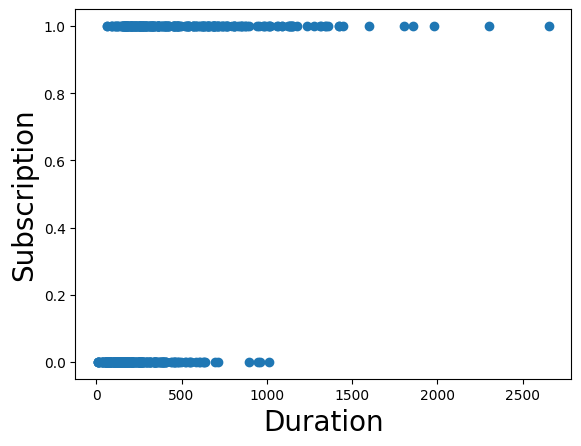

In [21]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(data['duration'],y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

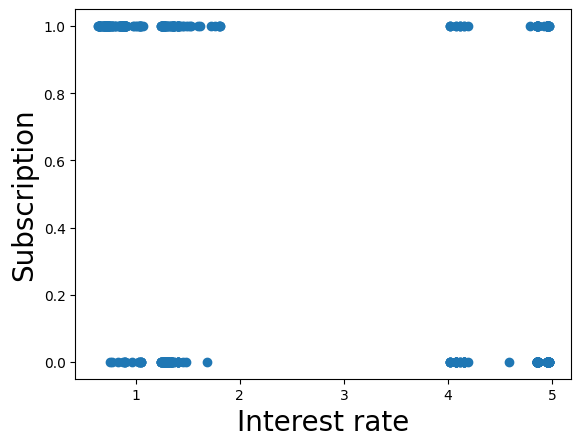

In [22]:
# Create a scatter plot of x1 (interest rate, no constant) and y (Subscribed)
plt.scatter(data['interest_rate'],y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Interest rate', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

### Confusion Matrix

Create the confusion matrix of the model and estimate its accuracy.

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [12]:
results_log.predict()

array([0.10845729, 0.94310101, 0.01016712, 0.8107996 , 0.00950534,
       0.53401102, 0.03208113, 0.00360438, 0.71233264, 0.06744818,
       0.9536981 , 0.49838996, 0.89280993, 0.1015164 , 0.07595256,
       0.81903592, 0.87459125, 0.84855627, 0.3728643 , 0.76321316,
       0.97293194, 0.87334213, 0.12982914, 0.09814958, 0.65435403,
       0.08506009, 0.77401405, 0.76293622, 0.90314904, 0.04231132,
       0.02297297, 0.12217763, 0.27155822, 0.71480891, 0.05771755,
       0.01197368, 0.99318432, 0.06187083, 0.99998254, 0.54171261,
       0.05858667, 0.84153321, 0.05871492, 0.00874369, 0.8683381 ,
       0.54679839, 0.00476303, 0.15173607, 0.15689295, 0.8281327 ,
       0.72220836, 0.05318745, 0.03268499, 0.05137519, 0.00752218,
       0.80512363, 0.09452058, 0.80034267, 0.98080827, 0.83781628,
       0.03688478, 0.1128039 , 0.98917666, 0.76387305, 0.16448677,
       0.30797084, 0.04896691, 0.05903493, 0.99644849, 0.06952408,
       0.02351395, 0.71587342, 0.13853176, 0.97026524, 0.87188

In [13]:
# predicted values
np.set_printoptions(formatter={'float': lambda x:"{0:0.2f}".format(x)})
results_log.predict()

array([0.11, 0.94, 0.01, 0.81, 0.01, 0.53, 0.03, 0.00, 0.71, 0.07, 0.95,
       0.50, 0.89, 0.10, 0.08, 0.82, 0.87, 0.85, 0.37, 0.76, 0.97, 0.87,
       0.13, 0.10, 0.65, 0.09, 0.77, 0.76, 0.90, 0.04, 0.02, 0.12, 0.27,
       0.71, 0.06, 0.01, 0.99, 0.06, 1.00, 0.54, 0.06, 0.84, 0.06, 0.01,
       0.87, 0.55, 0.00, 0.15, 0.16, 0.83, 0.72, 0.05, 0.03, 0.05, 0.01,
       0.81, 0.09, 0.80, 0.98, 0.84, 0.04, 0.11, 0.99, 0.76, 0.16, 0.31,
       0.05, 0.06, 1.00, 0.07, 0.02, 0.72, 0.14, 0.97, 0.87, 0.13, 0.67,
       0.05, 0.01, 0.03, 0.92, 0.79, 0.89, 0.13, 0.19, 0.98, 0.64, 0.86,
       0.74, 0.03, 0.08, 0.03, 0.71, 0.64, 0.95, 0.97, 0.97, 0.03, 0.98,
       0.06, 0.99, 0.07, 0.99, 0.69, 0.28, 0.36, 0.20, 0.70, 0.73, 0.03,
       0.99, 0.41, 0.16, 0.05, 0.94, 0.02, 0.04, 0.90, 0.50, 0.14, 0.10,
       0.00, 0.92, 1.00, 0.33, 0.98, 0.93, 0.84, 0.70, 0.67, 0.05, 0.26,
       0.81, 0.79, 0.81, 0.08, 0.22, 0.74, 0.11, 0.01, 0.01, 0.01, 0.23,
       0.79, 0.23, 1.00, 0.23, 0.01, 1.00, 0.54, 0.

In [14]:
# actual values
np.array(data['y'])

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [16]:
results_log.pred_table()

array([[218.00, 41.00],
       [30.00, 229.00]])

In [17]:
df = pd.DataFrame(results_log.pred_table())
df.columns = ['predicted 0','predicted 1']
df = df.rename(index ={0: 'Actual 0', 1: 'Actual 1'})
df

,predicted 0,predicted 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


In [18]:
# get the accuracy
cm = np.array(df)
accuracy = (cm[0,0]+cm[1,1])/cm.sum()
accuracy

0.862934362934363

In [19]:
def confusion_matrix(data,actual_values,model):

        # Confusion matrix

        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s

        # model: a LogitResults object
            # this is the variable where you have the fitted model
            # e.g. results_log in this course
        # ----------

        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and
        return cm, accuracy

In [20]:
confusion_matrix(x,y,results_log)

(array([[218.00, 41.00],
        [30.00, 229.00]]),
 0.862934362934363)

# Test the model


Declare the dependent and the independent variables


In [27]:
# load test data
test = pd.read_csv('/content/016 Bank-data-testing.csv')

In [28]:
test['y'] = test['y'].map({'yes':1,'no':0})

In [29]:
test.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4,4.963,0.0,0.0,0.0,0.0,36.0,0


In [25]:
x

,const,duration,interest_rate,march,credit,previous
0,1.0,117.0,1.334,1.0,0.0,0.0
1,1.0,274.0,0.767,0.0,0.0,1.0
2,1.0,167.0,4.858,1.0,0.0,0.0
3,1.0,686.0,4.120,0.0,0.0,0.0
4,1.0,157.0,4.856,1.0,0.0,0.0
...,...,...,...,...,...,...
513,1.0,204.0,1.334,1.0,0.0,0.0
514,1.0,806.0,0.861,0.0,0.0,1.0
515,1.0,290.0,0.879,0.0,0.0,0.0
516,1.0,473.0,0.877,0.0,0.0,1.0


In [44]:
test.rename(columns = {'Unnamed: 0':'const'},inplace=True)
test

,const,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,220,0.739,0.0,0.0,2.0,0.0,233.0,0


In [52]:
test_actual = test['y']
test_data = test.drop(['y','const','may'],axis = 1)
test_data

,interest_rate,credit,march,previous,duration
0,1.313,0.0,1.0,0.0,487.0
1,4.961,0.0,0.0,0.0,132.0
2,4.856,0.0,1.0,0.0,92.0
3,4.120,0.0,0.0,0.0,1468.0
4,4.963,0.0,0.0,0.0,36.0
...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,458.0
218,1.264,0.0,1.0,0.0,397.0
219,1.281,0.0,1.0,0.0,34.0
220,0.739,0.0,0.0,0.0,233.0


In [53]:
test_data = sm.add_constant(test_data)
test_data

,const,interest_rate,credit,march,previous,duration
0,1.0,1.313,0.0,1.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,132.0
2,1.0,4.856,0.0,1.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...
217,1.0,4.963,0.0,0.0,0.0,458.0
218,1.0,1.264,0.0,1.0,0.0,397.0
219,1.0,1.281,0.0,1.0,0.0,34.0
220,1.0,0.739,0.0,0.0,0.0,233.0



Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.


In [50]:
def confusion_matrix(data,actual_values,model):
  pred_values = model.predict(data)
  bins = np.array([0,0.5,1])
  cm = np.histogram2d(actual_values,pred_values,bins = bins)[0]
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  return cm, accuracy

In [54]:
confusion_matrix(test_data,test_actual,results_log)

(array([[0.00, 111.00],
        [0.00, 111.00]]),
 0.5)